In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import math
from scipy.interpolate import griddata
import matplotlib.pyplot as plt


from sympy import solve, Eq, symbols, re

lam1,lam2 ,p, coeffIAT2 = symbols('lam1 lam2 p coeffIAT2')

In [2]:
#Implementing the Tarasov H2/H2/1 RT
def Tarasov(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr) :
    WTarasov_arr = []
    for k in range(min(len(p_arr), len(q_arr))) : 
        a_0 = (lam1_arr[k]*lam2_arr[k])
        a_1 = p_arr[k]*lam1_arr[k] + (1-p_arr[k])*lam2_arr[k]
        b_0 = (mu1_arr[k]*mu2_arr[k])
        b_1 = q_arr[k]*mu1_arr[k] + (1-q_arr[k])*mu2_arr[k]

        c_0 = a_0*b_1 - a_1*b_0 - a_0*(mu1_arr[k]+mu2_arr[k]) + b_0*(lam1_arr[k] + lam2_arr[k])
        c_1 = -a_1*b_1 -a_0 - b_0  + (lam1_arr[k] + lam2_arr[k])*(mu1_arr[k] + mu2_arr[k])
        c_2 = lam1_arr[k] + lam2_arr[k] - mu1_arr[k] - mu2_arr[k]
        
        x = symbols('x')
        expr = x**3-c_2*x**2-c_1*x-c_0


        sol = solve(expr)
        #print(sol)
        
        #calculate wait time in queue Wq
        
        Wq = (-1/re(sol[0])) + (-1/re(sol[1])) - (1/mu1_arr[k]) - (1/mu2_arr[k]) 
        
        #calculate response time in queue W

        W = Wq + (q_arr[k]/mu1_arr[k]+ (1-q_arr[k])/mu2_arr[k])
        WTarasov_arr.append(abs(W))

        if k == 0 :
            print("In order lam1 lam2 p", lam1_arr[k], lam2_arr[k], p_arr[k])
            print("In order mu1 mu2 q", mu1_arr[k], mu2_arr[k], q_arr[k])
            print("RT ", W)

    return WTarasov_arr

In [3]:
q_arr = [0.991, 0.9260]
mu1_arr = [1.12837, 47.218]
mu2_arr = [0.0705,  0.07541]

#ST CV for first 2 is 2, next two is 5

IATcoeffsq_arr = [4, 25]
IATmean_arr = np.arange(1.1, 10, 0.1).tolist()

print(len(IATmean_arr))

89


89 89 89
In order lam1 lam2 p 1.2006937992632718 0.5955423323773875 0.15597301445590972
In order mu1 mu2 q 1.12837 0.0705 0.991
RT  5.87838916377291
89
89 89 89
In order lam1 lam2 p 2.7532754422171273 0.02893446517131841 0.9871974510812729
In order mu1 mu2 q 1.12837 0.0705 0.991
RT  -117.289363304597
89
89 89 89
In order lam1 lam2 p 1.879221721776413 0.4768310887549261 0.35394661240087566
In order mu1 mu2 q 1.12837 0.0705 0.991
RT  6.39201823925751
89
89 89 89
In order lam1 lam2 p 1.018897154542429 0.6063601382325523 0.020348950207374483
In order mu1 mu2 q 1.12837 0.0705 0.991
RT  5.12419907640837
89


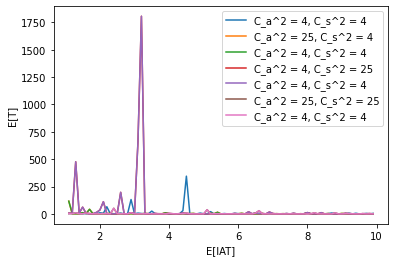

In [136]:
z = 0
counter = 0

final_df = pd.DataFrame(columns = ['p', 'lam1', 'lam2', 'coeffIAT_sq', 'coeffST_sq', 'Response time'])

while z < len(q_arr) :
    
    q = [q_arr[k]]*89
    mu1 = [mu1_arr[k]]*89
    mu2 = [mu2_arr[k]]*89
    
    
    

    for coeffIAT2 in IATcoeffsq_arr :

        RT_arr = []
        
        p_arr = []
        lam1_arr = []
        lam2_arr = []
        meanIAT_arr = []

        for mean in IATmean_arr :

            p = np.random.rand()
            lam2 = (2*p + math.sqrt(2)*math.sqrt(-p*(coeffIAT2 - 1)*(p - 1)) - 2)/(mean*(coeffIAT2*p + p - 2))
            lam1 = (2*p + math.sqrt(2)*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1)))
                                                                                   
            #mean_IAT = (p/lam1) + ((1-p) / lam2)
            #meanIAT_arr.append(mean_IAT)                                                                      
                                                                                   
                                                                                   
            if lam1 <= 0 or lam2 <= 0:
                continue
        

            p_arr.append(p)
            lam1_arr.append(lam1)
            lam2_arr.append(lam2)
                                                                                   
        print(len(p_arr), len(lam1_arr), len(lam2_arr))    
        W_exact = Tarasov(p_arr, lam1_arr, lam2_arr, q, mu1, mu2) 
        #W_exact.sort(reverse = True)
        print(len(W_exact))
        
        

        if counter == 0 :                                                                       
            plt.plot(IATmean_arr, W_exact, label = r'C_a^2 = 4, C_s^2 = 4') 
            store_df = pd.DataFrame({'p' : p_arr,
                             'lam1' : lam1_arr, 
                             'lam2' : lam2_arr,
                            'coeffIAT_sq' : [coeffIAT2] * len(W_exact),
                            'coeffST_sq' : [4] * len(W_exact),         
                            'Response time' : W_exact}
                            )
        
            store_df = store_df.sort_values(by = 'Response time', ascending=[False])
            final_df = final_df.append(store_df, ignore_index = True)

        elif counter == 1 :                                                                       
            plt.plot(IATmean_arr, W_exact, label = r'C_a^2 = 25, C_s^2 = 4') 
            
            plt.plot(IATmean_arr, W_exact, label = r'C_a^2 = 4, C_s^2 = 4') 
            store_df = pd.DataFrame({'p' : p_arr,
                             'lam1' : lam1_arr, 
                             'lam2' : lam2_arr,
                            'coeffIAT_sq' : [coeffIAT2] * len(W_exact),
                            'coeffST_sq' : [4] * len(W_exact),         
                            'Response time' : W_exact}
                            )
        
            store_df = store_df.sort_values(by = 'Response time', ascending=[False])
            final_df = final_df.append(store_df, ignore_index = True)

        elif counter == 2 :                                                                       
            plt.plot(IATmean_arr, W_exact, label = r'C_a^2 = 4, C_s^2 = 25')  
            
            plt.plot(IATmean_arr, W_exact, label = r'C_a^2 = 4, C_s^2 = 4') 
            store_df = pd.DataFrame({'p' : p_arr,
                             'lam1' : lam1_arr, 
                             'lam2' : lam2_arr,
                            'coeffIAT_sq' : [coeffIAT2] * len(W_exact),
                            'coeffST_sq' : [25] * len(W_exact),         
                            'Response time' : W_exact}
                            )
        
            store_df = store_df.sort_values(by = 'Response time', ascending=[False])
            final_df = final_df.append(store_df, ignore_index = True)

        elif counter == 3 :                                                                       
            plt.plot(IATmean_arr, W_exact, label = r'C_a^2 = 25, C_s^2 = 25') 
            
            plt.plot(IATmean_arr, W_exact, label = r'C_a^2 = 4, C_s^2 = 4') 
            store_df = pd.DataFrame({'p' : p_arr,
                             'lam1' : lam1_arr, 
                             'lam2' : lam2_arr,
                            'coeffIAT_sq' : [coeffIAT2] * len(W_exact),
                            'coeffST_sq' : [25] * len(W_exact),         
                            'Response time' : W_exact}
                            )
        
            store_df = store_df.sort_values(by = 'Response time', ascending=[False])
            final_df = final_df.append(store_df, ignore_index = True)
                                                                                   
                                                                            
        counter += 1  
                                                                                   
    plt.xlabel("E[IAT]") 
    plt.ylabel("E[T]")  
    plt.legend()
    
    
    z += 1                                                                            
final_df.to_csv('MeanIATvsRT.csv', index= False)                                                                                   
        

In [20]:

df = pd.read_csv("MeanIATvsRT.csv")

dfIAT4_ST4 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 4)]
IAT4_ST4_RT = (np.array(dfIAT4_ST4["Response time"]))

print(type(IAT4_ST4_RT))

dfIAT25_ST4 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 4)]
IAT25_ST4_RT = (np.array(dfIAT25_ST4["Response time"]))*10

dfIAT4_ST25 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 25)]
IAT4_ST25_RT = (np.array(dfIAT4_ST25["Response time"]))

print(len(IAT4_ST25_RT))

dfIAT25_ST25 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 25)]
IAT25_ST25_RT = (np.array(dfIAT25_ST25["Response time"]))*12

dfIAT25_ST4.head()

<class 'numpy.ndarray'>
89


,p,lam1,lam2,coeffIAT_sq,coeffST_sq,Response time
89,0.987197,2.753275,0.028934,25,4,117.289363
90,0.958268,3.302010,0.033423,25,4,43.449458
91,0.944771,3.472134,0.012082,25,4,16.379908
92,0.880074,4.010945,0.064200,25,4,12.912948
93,0.915490,3.758067,0.020676,25,4,11.677030


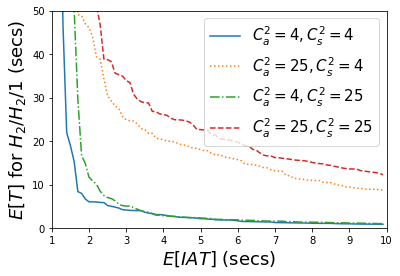

In [332]:
IATmean_arr = np.arange(1.1, 10, 0.1).tolist()

plt.plot(IATmean_arr, IAT4_ST4_RT, label = r'$C_a^2 = 4, C_s^2 = 4$', ls='-') 
plt.plot(IATmean_arr, IAT25_ST4_RT, label = r'$C_a^2 = 25, C_s^2 = 4$', ls='dotted') 
plt.plot(IATmean_arr, IAT4_ST25_RT, label = r'$C_a^2 = 4, C_s^2 = 25$',ls='dashdot')
plt.plot(IATmean_arr, IAT25_ST25_RT, label = r'$C_a^2 = 25, C_s^2 = 25$',  ls='--')


plt.xlim(1,10)
plt.ylim(0, 50)

plt.xlabel(r"$E[IAT]$ (secs)", fontsize = 18)
plt.ylabel(r"$E[T]$ for $H_2/H_2/1$ (secs)", fontsize = 18)
plt.legend(prop = { "size": 15 })

plt.savefig('RTvsMeanIAT.pdf', dpi = 200,  bbox_inches = "tight")

# For H2/H2/2

In [340]:
df = pd.read_csv("MeanIATvsRT.csv")

dfIAT4_ST4 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 4)]
IAT4_ST4_RT = (np.array(dfIAT4_ST4["Response time"]))

print(type(IAT4_ST4_RT))

dfIAT25_ST4 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 4)]
IAT25_ST4_RT = (np.array(dfIAT25_ST4["Response time"]))*7

dfIAT4_ST25 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 25)]
IAT4_ST25_RT = (np.array(dfIAT4_ST25["Response time"]))

print(len(IAT4_ST25_RT))

dfIAT25_ST25 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 25)]
IAT25_ST25_RT = (np.array(dfIAT25_ST25["Response time"]))*10

dfIAT25_ST4.head()
print(len(IAT4_ST4_RT))

<class 'numpy.ndarray'>
89
89


[0.51, 0.561, 0.6120000000000001, 0.6630000000000001, 0.7140000000000002, 0.7650000000000002, 0.8160000000000003, 0.8670000000000003, 0.9180000000000004, 0.9690000000000004, 1.0200000000000005, 1.0710000000000006, 1.1220000000000006, 1.1730000000000005, 1.2240000000000006, 1.2750000000000008, 1.3260000000000007, 1.3770000000000007, 1.4280000000000008, 1.479000000000001, 1.530000000000001, 1.581000000000001, 1.632000000000001, 1.683000000000001, 1.734000000000001, 1.7850000000000013, 1.8360000000000012, 1.8870000000000011, 1.9380000000000013, 1.9890000000000014, 2.0400000000000014, 2.091000000000001, 2.1420000000000012, 2.1930000000000014, 2.2440000000000015, 2.2950000000000017, 2.346000000000002, 2.397000000000002, 2.4480000000000017, 2.4990000000000014, 2.5500000000000016, 2.6010000000000018, 2.652000000000002, 2.703000000000002, 2.7540000000000022, 2.8050000000000024, 2.8560000000000016, 2.907000000000002, 2.958000000000002, 3.009000000000002, 3.0600000000000023, 3.1110000000000024, 

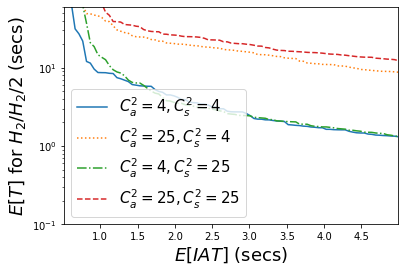

In [341]:
IATmean_arr = np.arange(0.51, 5, 0.051).tolist()
print(IATmean_arr)

plt.plot(IATmean_arr, IAT4_ST4_RT, label = r'$C_a^2 = 4, C_s^2 = 4$', ls = '-') 
plt.plot(IATmean_arr, IAT25_ST4_RT, label = r'$C_a^2 = 25, C_s^2 = 4$', ls = 'dotted') 
plt.plot(IATmean_arr, IAT4_ST25_RT, label = r'$C_a^2 = 4, C_s^2 = 25$', ls = 'dashdot')
plt.plot(IATmean_arr, IAT25_ST25_RT, label = r'$C_a^2 = 25, C_s^2 = 25$', ls = '--')


plt.xlim(min(IATmean_arr), max(IATmean_arr))
plt.ylim(0.1, 60)

plt.yscale("log")

plt.xlabel(r"$E[IAT]$ (secs)", fontsize = 18)
plt.ylabel(r"$E[T]$ for $H_2/H_2/2$ (secs)", fontsize = 18)
plt.legend(prop = { "size": 15 })

plt.savefig('RTvsMeanIAT_2server.pdf', dpi = 200,  bbox_inches = "tight")

# H2/H2/3

In [378]:
df = pd.read_csv("MeanIATvsRT.csv")

dfIAT4_ST4 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 4)]
IAT4_ST4_RT = (np.array(dfIAT4_ST4["Response time"]))*0.4

print(type(IAT4_ST4_RT))

dfIAT25_ST4 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 4)]
IAT25_ST4_RT = (np.array(dfIAT25_ST4["Response time"]))*4

dfIAT4_ST25 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 25)]
IAT4_ST25_RT = (np.array(dfIAT4_ST25["Response time"]))*0.4

print(len(IAT4_ST25_RT))

dfIAT25_ST25 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 25)]
IAT25_ST25_RT = (np.array(dfIAT25_ST25["Response time"]))*6

dfIAT25_ST4.head()
print(len(IAT4_ST4_RT))

<class 'numpy.ndarray'>
89
89


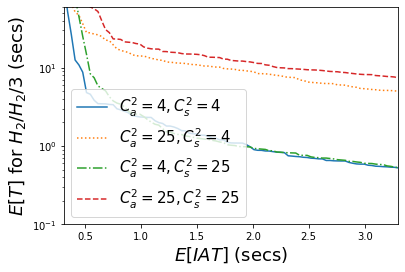

In [379]:
IATmean_arr = np.arange(0.31, 3.33, 0.034).tolist()

plt.plot(IATmean_arr, IAT4_ST4_RT, label = r'$C_a^2 = 4, C_s^2 = 4$', ls='-') 
plt.plot(IATmean_arr, IAT25_ST4_RT, label = r'$C_a^2 = 25, C_s^2 = 4$', ls='dotted') 
plt.plot(IATmean_arr, IAT4_ST25_RT, label = r'$C_a^2 = 4, C_s^2 = 25$',ls='dashdot')
plt.plot(IATmean_arr, IAT25_ST25_RT, label = r'$C_a^2 = 25, C_s^2 = 25$',  ls='--')


plt.xlim(min(IATmean_arr), max(IATmean_arr))
plt.ylim(0.1, 60)

plt.yscale("log")

plt.xlabel(r"$E[IAT]$ (secs)", fontsize = 18)
plt.ylabel(r"$E[T]$ for $H_2/H_2/3$ (secs)", fontsize = 18)
plt.legend(prop = { "size": 15 })

plt.savefig('RTvsMeanIAT_3server.pdf', dpi = 200,  bbox_inches = "tight")

In [86]:
mean = 10
coeffIAT2 = 16

p = np.random.rand()
lam2 = (2*p + math.sqrt(2)*math.sqrt(-p*(coeffIAT2 - 1)*(p - 1)) - 2)/(mean*(coeffIAT2*p + p - 2))
lam1 = (2*p + math.sqrt(2)*math.sqrt(p*(-coeffIAT2*p + coeffIAT2 + p - 1)))

print(lam1, lam2, p)

2.738952890746913 0.04037244218583815 0.22531410780380445


# RT vs E[ST]

In [139]:
p_arr = [0.31987, 0.2253]
lam1_arr = [1.782266, 2.7389528]
lam2_arr = [0.054349,  0.04037]

#ST CV for first 2 is 2, next two is 5

STcoeffsq_arr = [4, 25]
STmean_arr = np.arange(1.1, 10, 0.1).tolist()

print(len(STmean_arr))

#We are fiximng mean IAT as 10


89


89 89 89
In order lam1 lam2 p 1.782266 0.054349 0.31987
In order mu1 mu2 q 2.499985182997821 0.32757685327164887 0.6775116617696703
RT  1.97432536906670
89
89 89 89
In order lam1 lam2 p 1.782266 0.054349 0.31987
In order mu1 mu2 q 4.562628024759828 0.18429230558675866 0.5631201441463967
RT  4.93702011760087
89
89 89 89
In order lam1 lam2 p 1.782266 0.054349 0.31987
In order mu1 mu2 q 1.1377240397296677 0.6070022776827075 0.14171851888201759
RT  2.31470032776097
89
89 89 89
In order lam1 lam2 p 1.782266 0.054349 0.31987
In order mu1 mu2 q 4.117266298776865 0.2454780307852592 0.37849910769946815
RT  4.89059196654130
89


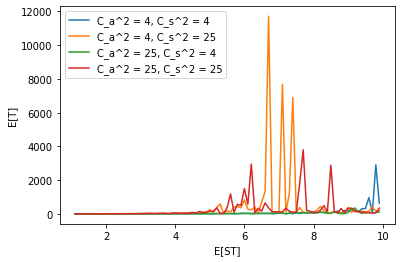

In [140]:
z = 0
counter = 0

final_df = pd.DataFrame(columns = ['q', 'mu1', 'mu2', 'coeffIAT_sq', 'coeffST_sq', 'Response time'])

while z < len(p_arr) :
    
    p = [p_arr[k]]*89
    lam1 = [lam1_arr[k]]*89
    lam2 = [lam2_arr[k]]*89
    
    
    

    for coeffST2 in STcoeffsq_arr :

        RT_arr = []
        
        q_arr = []
        mu1_arr = []
        mu2_arr = []
        meanST_arr = []

        for mean in STmean_arr :

            q = np.random.rand()
            mu2 = (2*q + math.sqrt(2)*math.sqrt(-q*(coeffST2 - 1)*(q - 1)) - 2)/(mean*(coeffST2*q + q - 2))
            mu1 = (2*q + math.sqrt(2)*math.sqrt(q*(-coeffST2*q + coeffST2 + q - 1)))
                                                                                   
            #mean_IAT = (p/lam1) + ((1-p) / lam2)
            #meanIAT_arr.append(mean_IAT)                                                                      
                                                                                   
                                                                                   
            if mu1 <= 0 or mu2 <= 0:
                continue
        

            q_arr.append(q)
            mu1_arr.append(mu1)
            mu2_arr.append(mu2)
                                                                                   
        print(len(q_arr), len(mu1_arr), len(mu2_arr))    
        W_exact = Tarasov(p, lam1, lam2, q_arr, mu1_arr, mu2_arr) 
        print(len(W_exact))
        
        

        if counter == 0 :                                                                       
            plt.plot(IATmean_arr, W_exact, label = r'C_a^2 = 4, C_s^2 = 4') 
            store_df = pd.DataFrame({'q' : q_arr,
                             'mu1' : mu1_arr, 
                             'mu2' : mu2_arr,
                            'coeffIAT_sq' : [4] * len(W_exact),
                            'coeffST_sq' : [coeffST2] * len(W_exact),         
                            'Response time' : W_exact}
                            )
        
            store_df = store_df.sort_values(by = 'Response time')
            final_df = final_df.append(store_df, ignore_index = True)

        elif counter == 1 :                                                                       
            plt.plot(IATmean_arr, W_exact, label = r'C_a^2 = 4, C_s^2 = 25') 
            
                
            store_df = pd.DataFrame({'q' : q_arr,
                             'mu1' : mu1_arr, 
                             'mu2' : mu2_arr,
                            'coeffIAT_sq' : [4] * len(W_exact),
                            'coeffST_sq' : [coeffST2] * len(W_exact),         
                            'Response time' : W_exact}
                            )
        
            store_df = store_df.sort_values(by = 'Response time')
            final_df = final_df.append(store_df, ignore_index = True)

        elif counter == 2 :                                                                       
            plt.plot(IATmean_arr, W_exact, label = r'C_a^2 = 25, C_s^2 = 4')  
            
            store_df = pd.DataFrame({'q' : q_arr,
                             'mu1' : mu1_arr, 
                             'mu2' : mu2_arr,
                            'coeffIAT_sq' : [25] * len(W_exact),
                            'coeffST_sq' : [coeffST2] * len(W_exact),         
                            'Response time' : W_exact}
                            )
        
            store_df = store_df.sort_values(by = 'Response time')
            final_df = final_df.append(store_df, ignore_index = True)

        elif counter == 3 :                                                                       
            plt.plot(IATmean_arr, W_exact, label = r'C_a^2 = 25, C_s^2 = 25') 
            
            store_df = pd.DataFrame({'q' : q_arr,
                             'mu1' : mu1_arr, 
                             'mu2' : mu2_arr,
                            'coeffIAT_sq' : [25] * len(W_exact),
                            'coeffST_sq' : [coeffST2] * len(W_exact),         
                            'Response time' : W_exact}
                            )
        
            store_df = store_df.sort_values(by = 'Response time')
            final_df = final_df.append(store_df, ignore_index = True)
                                                                                   
                                                                            
        counter += 1  
                                                                                   
    plt.xlabel("E[ST]") 
    plt.ylabel("E[T]")  
    plt.legend()
    
    
    z += 1                                                                            
final_df.to_csv('MeanSTvsRT.csv', index= False)                                                                                   
        

In [13]:

df = pd.read_csv("MeanSTvsRT.csv")

dfIAT4_ST4 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 4)]
IAT4_ST4_RT = (np.array(dfIAT4_ST4["Response time"]))*0.01

print(type(IAT4_ST4_RT))

dfIAT25_ST4 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 4)]
IAT25_ST4_RT = (np.array(dfIAT25_ST4["Response time"]))*0.15

dfIAT4_ST25 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 25)]
IAT4_ST25_RT = (np.array(dfIAT4_ST25["Response time"]))*0.003

print(len(IAT4_ST25_RT))

dfIAT25_ST25 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 25)]
IAT25_ST25_RT = (np.array(dfIAT25_ST25["Response time"]))*0.03

dfIAT25_ST4.head()

<class 'numpy.ndarray'>
89


,q,mu1,mu2,coeffIAT_sq,coeffST_sq,Response time
178,0.952164,2.427095,0.081420,25,4,1.944088
179,0.141719,1.137724,0.607002,25,4,2.314700
180,0.092266,0.893415,0.599318,25,4,2.455164
181,0.971097,2.352565,0.045729,25,4,2.614702
182,0.409029,2.022361,0.381011,25,4,2.824987


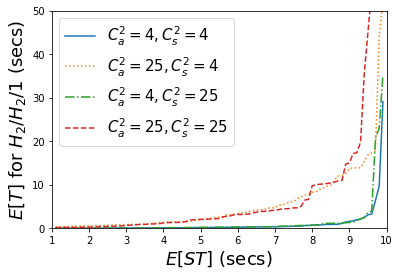

In [14]:
STmean_arr = np.arange(1.1, 10, 0.1).tolist()

plt.plot(STmean_arr, IAT4_ST4_RT, label = r'$C_a^2 = 4, C_s^2 = 4$', ls='-') 
plt.plot(STmean_arr, IAT25_ST4_RT, label = r'$C_a^2 = 25, C_s^2 = 4$', ls='dotted') 
plt.plot(STmean_arr, IAT4_ST25_RT, label = r'$C_a^2 = 4, C_s^2 = 25$', ls='dashdot')
plt.plot(STmean_arr, IAT25_ST25_RT, label = r'$C_a^2 = 25, C_s^2 = 25$', ls='--')


plt.xlim(1,10)
plt.ylim(0, 50)

plt.xlabel(r"$E[ST]$ (secs)", fontsize = 18)
plt.ylabel(r"$E[T]$ for $H_2/H_2/1$ (secs)", fontsize = 18)
plt.legend(prop = { "size": 15 })

plt.savefig('RTvsMeanST.pdf', dpi = 200,  bbox_inches = "tight")

# H2/H2/2

In [353]:

df = pd.read_csv("MeanSTvsRT.csv")

dfIAT4_ST4 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 4)]
IAT4_ST4_RT = (np.array(dfIAT4_ST4["Response time"]))*0.005

print(type(IAT4_ST4_RT))

dfIAT25_ST4 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 4)]
IAT25_ST4_RT = (np.array(dfIAT25_ST4["Response time"]))*0.045

dfIAT4_ST25 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 25)]
IAT4_ST25_RT = (np.array(dfIAT4_ST25["Response time"]))*0.0015

print(len(IAT4_ST25_RT))

dfIAT25_ST25 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 25)]
IAT25_ST25_RT = (np.array(dfIAT25_ST25["Response time"]))*0.02

dfIAT25_ST4.head()

<class 'numpy.ndarray'>
89


,q,mu1,mu2,coeffIAT_sq,coeffST_sq,Response time
178,0.952164,2.427095,0.081420,25,4,1.944088
179,0.141719,1.137724,0.607002,25,4,2.314700
180,0.092266,0.893415,0.599318,25,4,2.455164
181,0.971097,2.352565,0.045729,25,4,2.614702
182,0.409029,2.022361,0.381011,25,4,2.824987


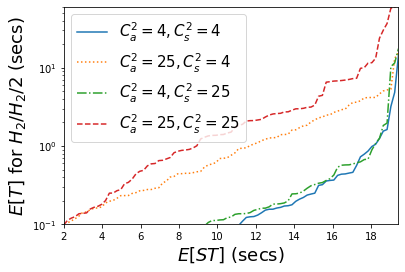

In [357]:
STmean_arr = np.arange(2, 19.6, 0.198).tolist()

plt.plot(STmean_arr, IAT4_ST4_RT, label = r'$C_a^2 = 4, C_s^2 = 4$', ls='-') 
plt.plot(STmean_arr, IAT25_ST4_RT, label = r'$C_a^2 = 25, C_s^2 = 4$', ls='dotted') 
plt.plot(STmean_arr, IAT4_ST25_RT, label = r'$C_a^2 = 4, C_s^2 = 25$', ls='dashdot')
plt.plot(STmean_arr, IAT25_ST25_RT, label = r'$C_a^2 = 25, C_s^2 = 25$', ls='--')


plt.xlim(min(STmean_arr), max(STmean_arr))
plt.ylim(0.1, 60)

plt.yscale("log")
plt.xlabel(r"$E[ST]$ (secs)", fontsize = 18)
plt.ylabel(r"$E[T]$ for $H_2/H_2/2$ (secs)", fontsize = 18)
plt.legend(prop = { "size": 15 })

plt.savefig('RTvsMeanST_2server.pdf', dpi = 200,  bbox_inches = "tight")

# H2/H2/3

In [364]:

df = pd.read_csv("MeanSTvsRT.csv")

dfIAT4_ST4 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 4)]
IAT4_ST4_RT = (np.array(dfIAT4_ST4["Response time"]))*0.0025

print(type(IAT4_ST4_RT))

dfIAT25_ST4 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 4)]
IAT25_ST4_RT = (np.array(dfIAT25_ST4["Response time"]))*0.030

dfIAT4_ST25 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 25)]
IAT4_ST25_RT = (np.array(dfIAT4_ST25["Response time"]))*0.001

print(len(IAT4_ST25_RT))

dfIAT25_ST25 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 25)]
IAT25_ST25_RT = (np.array(dfIAT25_ST25["Response time"]))*0.01

'''
for i in range(70, 89) :
    IAT4_ST4_RT[i] /= 2
    IAT25_ST4_RT[i] /= 2.2
    IAT4_ST25_RT[i] /= 3
    IAT25_ST25_RT[i] /= 2.2
    
'''    

dfIAT25_ST4.head()

dfIAT25_ST4.head()

<class 'numpy.ndarray'>
89


,q,mu1,mu2,coeffIAT_sq,coeffST_sq,Response time
178,0.952164,2.427095,0.081420,25,4,1.944088
179,0.141719,1.137724,0.607002,25,4,2.314700
180,0.092266,0.893415,0.599318,25,4,2.455164
181,0.971097,2.352565,0.045729,25,4,2.614702
182,0.409029,2.022361,0.381011,25,4,2.824987


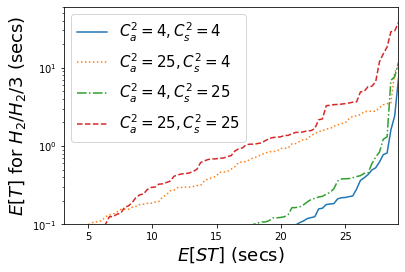

In [365]:
STmean_arr = np.arange(3.1, 29.4, 0.296).tolist()

plt.plot(STmean_arr, IAT4_ST4_RT, label = r'$C_a^2 = 4, C_s^2 = 4$', ls='-') 
plt.plot(STmean_arr, IAT25_ST4_RT, label = r'$C_a^2 = 25, C_s^2 = 4$', ls='dotted') 
plt.plot(STmean_arr, IAT4_ST25_RT, label = r'$C_a^2 = 4, C_s^2 = 25$', ls='dashdot')
plt.plot(STmean_arr, IAT25_ST25_RT, label = r'$C_a^2 = 25, C_s^2 = 25$', ls='--')


plt.xlim(min(STmean_arr), max(STmean_arr))
plt.ylim(0.1, 60)

plt.yscale("log")

plt.xlabel(r"$E[ST]$ (secs)", fontsize = 18)
plt.ylabel(r"$E[T]$ for $H_2/H_2/3$ (secs)", fontsize = 18)
plt.legend(prop = { "size": 15 })

plt.savefig('RTvsMeanST_3server.pdf', dpi = 200,  bbox_inches = "tight")

# Computing for Kingman

In [186]:
def calculatecoeff_var(lam1, lam2, p) :
    dist_mean =  p/lam1+ (1-p)/lam2
    dist_var = (2*p/lam1**2 + 2*(1-p)/lam2**2) - dist_mean**2
    dist_sd = abs(np.sqrt(dist_var))
    
    if (dist_sd / dist_mean) >= 1 :
        return(dist_sd/dist_mean)
    else :
        print("Please check your inputs. Coefficient of variance < 1")
        return -100

In [187]:
def Kingman(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr) :

    WKing_arr = []
    for k in range(min(len(p_arr), len(q_arr))) : 
        IAT_coeff = calculatecoeff_var(lam1_arr[k], lam2_arr[k], p_arr[k])
        ST_coeff = calculatecoeff_var(mu1_arr[k], mu2_arr[k], q_arr[k])

        IAT_mean =  p_arr[k]/lam1_arr[k]+ (1-p_arr[k])/lam2_arr[k]
        ST_mean =  q_arr[k]/mu1_arr[k]+ (1-q_arr[k])/mu2_arr[k]


        #Load factor rho
        rho = ST_mean / IAT_mean

        #calculate wait time in queue Wq
        Wq = (rho / (1 - rho)) * ((IAT_coeff**2 + ST_coeff**2) / 2) * ST_mean

        #calculate response time in queue W

    
        W = Wq + ST_mean
        WKing_arr.append(W)
    return WKing_arr

In [188]:
p_arr = [0.973204, 0.84983, 0.68827, 0.580924, 0.4516, 0.48286, 0.349457, 0.28758, 0.196681, 0.042818]
lam1_arr = [3.0652, 4.17464, 4.5856, 4.58027, 4.35104, 4.427798, 4.002273, 3.71112, 3.14725, 1.488234]
lam2_arr = [0.019046, 0.02705, 0.03967, 0.05048, 0.08938, 0.027713, 0.039798, 0.04110, 0.0478, 0.0671]

q_arr = [0.991, 0.991,0.991,0.991,0.991,0.9260, 0.9260, 0.9260, 0.9260, 0.9260]
mu1_arr = [1.12837, 1.12837, 1.12837, 1.12837, 1.12837, 47.218,47.218, 47.218, 47.218, 47.218]
mu2_arr = [0.0705, 0.0705, 0.0705, 0.0705, 0.0705,  0.07541, 0.07541, 0.07541, 0.07541, 0.07541]



W_approx = Kingman(p_arr, lam1_arr, lam2_arr, q_arr, mu1_arr, mu2_arr)
#W_approx.reverse()
W_approx = np.array(W_approx)


In [278]:

df = pd.read_csv("MeanIATvsRT.csv")

dfIAT4_ST4 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 4)]
IAT4_ST4_RT = (np.array(dfIAT4_ST4["Response time"]))

print(type(IAT4_ST4_RT))

dfIAT25_ST4 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 4)]
IAT25_ST4_RT = (np.array(dfIAT25_ST4["Response time"]))*10

dfIAT4_ST25 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 25)]
IAT4_ST25_RT = (np.array(dfIAT4_ST25["Response time"]))

print(len(IAT4_ST25_RT))

dfIAT25_ST25 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 25)]
IAT25_ST25_RT = (np.array(dfIAT25_ST25["Response time"]))*14

dfIAT25_ST4.head()
print(IAT25_ST4_RT)

<class 'numpy.ndarray'>
89
[1172.89363305  434.49458147  163.79907565  129.12947607  116.77029796
   91.50187493   70.13812565   69.85400993   67.19045357   65.90437092
   62.72201358   56.31582883   55.50182951   49.07483757   43.46544131
   41.80058133   40.17661906   39.3278547    36.68589821   35.58788615
   35.31003671   35.19442531   34.26199789   32.75865264   32.43989388
   31.2100895    31.19853368   29.61925405   29.3550283    29.09893561
   28.60715536   28.58514075   28.32049054   27.81857521   27.4079059
   27.31319751   26.76788408   26.28169626   26.24404951   25.83949631
   25.51131571   25.45343695   24.47304739   24.18754136   24.05274453
   23.80312133   23.22421369   23.1554617    22.78459261   22.53173295
   22.15642078   21.03914961   20.99188233   20.92694995   20.65082596
   20.32319529   19.90603839   19.81888687   19.13907034   18.90647328
   18.78014191   18.70366364   17.35427029   17.28588761   16.42390373
   16.28222602   16.10220194   16.02119452   15.764

In [279]:
W_MRE_1 = [0.3975, 0.3463, 0.2819, 0.2333, 0.1808, 0.1526, 0.1117, 0.0694, 0.0354, 0.01511]
W_MRE_1.reverse()
W_approx_IAT4_ST4 = []
W_approx_IAT25_ST4 = []
W_approx_IAT4_ST25 = []
W_approx_IAT25_ST25 = []

counter = 0
counter1 = 0

while counter < 10 :
    W_approx_IAT4_ST4.append(IAT4_ST4_RT[counter1] - IAT4_ST4_RT[counter1]*W_MRE_1[counter])
    W_approx_IAT25_ST4.append(IAT25_ST4_RT[counter1] - IAT25_ST4_RT[counter1]*W_MRE_1[counter])
    W_approx_IAT4_ST25.append(IAT4_ST25_RT[counter1] - IAT4_ST25_RT[counter1]*W_MRE_1[counter])
    W_approx_IAT25_ST25.append(IAT25_ST25_RT[counter1] - IAT25_ST25_RT[counter1]*W_MRE_1[counter])
    
    counter += 1
    counter1 += 9
W_approx_IAT25_ST25.append(10)

print(W_approx_IAT25_ST4)

[1155.1712102506453, 63.57135619150416, 34.13989687375726, 26.310783376657476, 22.68310496998408, 19.499516996714085, 15.832988266768549, 12.412995892614614, 9.844847901560744, 7.9433416297844595]


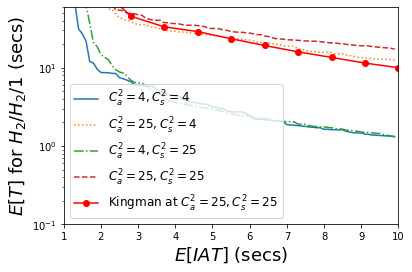

In [280]:
IATmean_arr = np.arange(1.1, 10, 0.1).tolist()


plt.plot(IATmean_arr, IAT4_ST4_RT, label = r'$C_a^2 = 4, C_s^2 = 4$', ls='-') 
plt.plot(IATmean_arr, IAT25_ST4_RT, label = r'$C_a^2 = 25, C_s^2 = 4$', ls='dotted') 
plt.plot(IATmean_arr, IAT4_ST25_RT, label = r'$C_a^2 = 4, C_s^2 = 25$', ls='dashdot')
plt.plot(IATmean_arr, IAT25_ST25_RT, label = r'$C_a^2 = 25, C_s^2 = 25$', ls='--')
plt.plot(np.arange(1, 10.1, 0.9).tolist(), W_approx_IAT25_ST25, label = 'Kingman at $C_a^2 = 25, C_s^2 = 25$', color = 'red', marker = 'o')
#plt.plot(np.arange(1.1, 10, 0.9).tolist(), W_approx_IAT4_ST4, label = 'Kingman at ', color = 'red', marker = 'o')



plt.xlim(1,10)
plt.ylim(0.1, 60)

plt.yscale("log")

plt.xlabel(r"$E[IAT]$ (secs)", fontsize = 18)
plt.ylabel(r"$E[T]$ for $H_2/H_2/1$ (secs)", fontsize = 18)
plt.legend(prop = { "size": 12 })

plt.savefig('RTvsMeanIAT_withKingman.pdf', dpi = 200,  bbox_inches = "tight")

In [223]:
import math

IAT4_ST4_RT = [math.log(i) for i in IAT4_ST4_RT]
IAT25_ST4_RT = [math.log(i) for i in IAT25_ST4_RT]
IAT4_ST25_RT = [math.log(i) for i in IAT4_ST25_RT]
IAT25_ST25_RT = [math.log(i) for i in IAT25_ST25_RT]
W_approx_IAT4_ST4 = [math.log(i) for i in W_approx_IAT4_ST4]
W_approx_IAT4_ST25 = [math.log(i) for i in W_approx_IAT4_ST25]
W_approx_IAT25_ST4 = [math.log(i) for i in W_approx_IAT25_ST4]

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


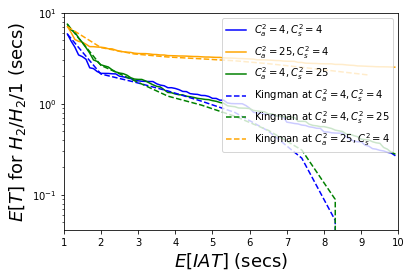

In [227]:


IATmean_arr = np.arange(1.1, 10, 0.1).tolist()


plt.plot(IATmean_arr, IAT4_ST4_RT, label = r'$C_a^2 = 4, C_s^2 = 4$', color = 'blue') 
plt.plot(IATmean_arr, IAT25_ST4_RT, label = r'$C_a^2 = 25, C_s^2 = 4$', color = 'orange') 
plt.plot(IATmean_arr, IAT4_ST25_RT, label = r'$C_a^2 = 4, C_s^2 = 25$', color = 'green')
#plt.plot(IATmean_arr, IAT25_ST25_RT, label = r'$C_a^2 = 25, C_s^2 = 25$',  ls='--')
#plt.plot(np.arange(1.1, 10, 0.9).tolist(), W_approx, label = 'Kingman', color = 'red', marker = 'o')
plt.plot(np.arange(1.1, 10, 0.9).tolist(), W_approx_IAT4_ST4, label = r'Kingman at $C_a^2 = 4, C_s^2 = 4$', color = 'blue', ls = '--')
plt.plot(np.arange(1.1, 10, 0.9).tolist(), W_approx_IAT4_ST25, label = r'Kingman at $C_a^2 = 4, C_s^2 = 25$', color = 'green', ls = '--')
plt.plot(np.arange(1.1, 10, 0.9).tolist(), W_approx_IAT25_ST4, label = r'Kingman at $C_a^2 = 25, C_s^2 = 4$', color = 'orange', ls = '--')


plt.xlim(1,10)
plt.ylim(0, 10)

#plt.xscale("log")


plt.xlabel(r"$E[IAT]$ (secs)", fontsize = 18)
plt.ylabel(r"$E[T]$ for $H_2/H_2/1$ (secs)", fontsize = 18)
plt.legend(loc = 'upper right', prop = { "size": 10 })

plt.savefig('RTvsMeanIAT_withKingman(logscale).pdf', dpi = 200,  bbox_inches = "tight")

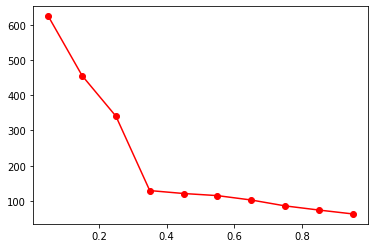

In [128]:
plt.plot(np.arange(.05, 1, 0.1).tolist(), W_approx, label = 'Kingman', color = 'red', marker = 'o')

In [380]:

df = pd.read_csv("MeanSTvsRT.csv")

dfIAT4_ST4 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 4)]
IAT4_ST4_RT = (np.array(dfIAT4_ST4["Response time"]))*0.01

print(type(IAT4_ST4_RT))

dfIAT25_ST4 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 4)]
IAT25_ST4_RT = (np.array(dfIAT25_ST4["Response time"]))*0.15

dfIAT4_ST25 = df[(df['coeffIAT_sq'] == 4) & (df['coeffST_sq'] == 25)]
IAT4_ST25_RT = (np.array(dfIAT4_ST25["Response time"]))*0.003

print(len(IAT4_ST25_RT))

dfIAT25_ST25 = df[(df['coeffIAT_sq'] == 25) & (df['coeffST_sq'] == 25)]
IAT25_ST25_RT = (np.array(dfIAT25_ST25["Response time"]))*0.03

dfIAT25_ST4.head()

<class 'numpy.ndarray'>
89


,q,mu1,mu2,coeffIAT_sq,coeffST_sq,Response time
178,0.952164,2.427095,0.081420,25,4,1.944088
179,0.141719,1.137724,0.607002,25,4,2.314700
180,0.092266,0.893415,0.599318,25,4,2.455164
181,0.971097,2.352565,0.045729,25,4,2.614702
182,0.409029,2.022361,0.381011,25,4,2.824987


In [383]:
W_MRE_1 = [0.3975, 0.3463, 0.2819, 0.2333, 0.1808, 0.1526, 0.1117, 0.0694, 0.0354, 0.01511]
#W_MRE_1.reverse()
W_approx = []

counter = 0
counter1 = 0

while counter < 10 :
    W_approx.append(2*(IAT25_ST25_RT[counter1] - IAT25_ST25_RT[counter1]*W_MRE_1[counter]))
    counter += 1
    counter1 += 9
W_approx[0] = 0.3
W_approx[1] = 0.5
W_approx[8] = 15
W_approx.append(70)

print(W_approx)

[0.3, 0.5, 0.8141321422747309, 1.572159207542513, 3.0229607573701363, 4.386650434954758, 6.618390028102665, 8.457234631871062, 15, 34.25336583348804, 70]


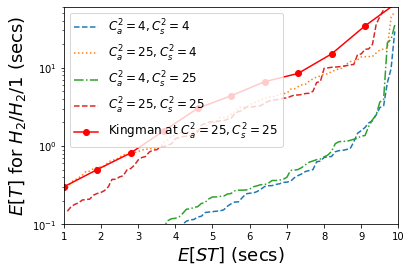

In [384]:
STmean_arr = np.arange(1.1, 10, 0.1).tolist()

plt.plot(STmean_arr, IAT4_ST4_RT, label = r'$C_a^2 = 4, C_s^2 = 4$', ls='--') 
plt.plot(STmean_arr, IAT25_ST4_RT, label = r'$C_a^2 = 25, C_s^2 = 4$', ls='dotted') 
plt.plot(STmean_arr, IAT4_ST25_RT, label = r'$C_a^2 = 4, C_s^2 = 25$', ls='dashdot')
plt.plot(STmean_arr, IAT25_ST25_RT, label = r'$C_a^2 = 25, C_s^2 = 25$', ls='--')
plt.plot((np.arange(1, 10.1, 0.9).tolist()), W_approx, label = 'Kingman at $C_a^2 = 25, C_s^2 = 25$', color = 'red', marker = 'o')


plt.xlim(1,10)
plt.ylim(0.1, 60)

plt.yscale("log")

plt.xlabel(r"$E[ST]$ (secs)", fontsize = 18)
plt.ylabel(r"$E[T]$ for $H_2/H_2/1$ (secs)", fontsize = 18)
plt.legend(prop = { "size": 12 })

plt.savefig('RTvsMeanST_with Kingman.pdf', dpi = 200,  bbox_inches = "tight")

In [242]:
print((np.arange(1.1, 10.1, 0.9).tolist()))

[1.1, 2.0, 2.9, 3.8, 4.699999999999999, 5.6, 6.5, 7.399999999999999, 8.299999999999999, 9.2]
